In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper')


In [2]:
# Load data
df = pd.read_csv('../data/deduplication.csv')
df_plain_run = pd.read_csv('../data/plain_run.csv')
df_jpeg = pd.read_csv('../data/jpeg.csv')

# _x = deduplication, _y = jpeg, rest = plain run
df_merged = pd.merge(pd.merge(df, df_jpeg, on='file_name'), df_plain_run, on='file_name')

df_merged[df_merged['file_name'] == 'test_medium'].sort_values(['transcoding_time_x'])


,file_name,file_size_original_x,file_size_transcoded_x,compression_ratio_x,transcoding_time_x,similarity,file_size_original_y,file_size_transcoded_y,compression_ratio_y,transcoding_time_y,file_size_original,file_size_transcoded,compression_ratio,transcoding_time
104,test_medium,3886238,4495588,1.156797,2983,0.0,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
109,test_medium,3886238,7395551,1.903010,150087,0.1,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
103,test_medium,3886238,13498598,3.473436,529105,0.2,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
100,test_medium,3886238,13833931,3.559723,553877,0.3,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
108,test_medium,3886238,14056693,3.617044,578387,0.4,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
106,test_medium,3886238,14310348,3.682314,593000,0.5,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
107,test_medium,3886238,14606262,3.758458,624903,0.6,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
99,test_medium,3886238,14701983,3.783089,636566,0.9,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
101,test_medium,3886238,14702810,3.783301,637215,1.0,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916
102,test_medium,3886238,14708301,3.784714,648163,0.8,3886238,642346,0.165287,187,3886238,14702810,3.783301,3916


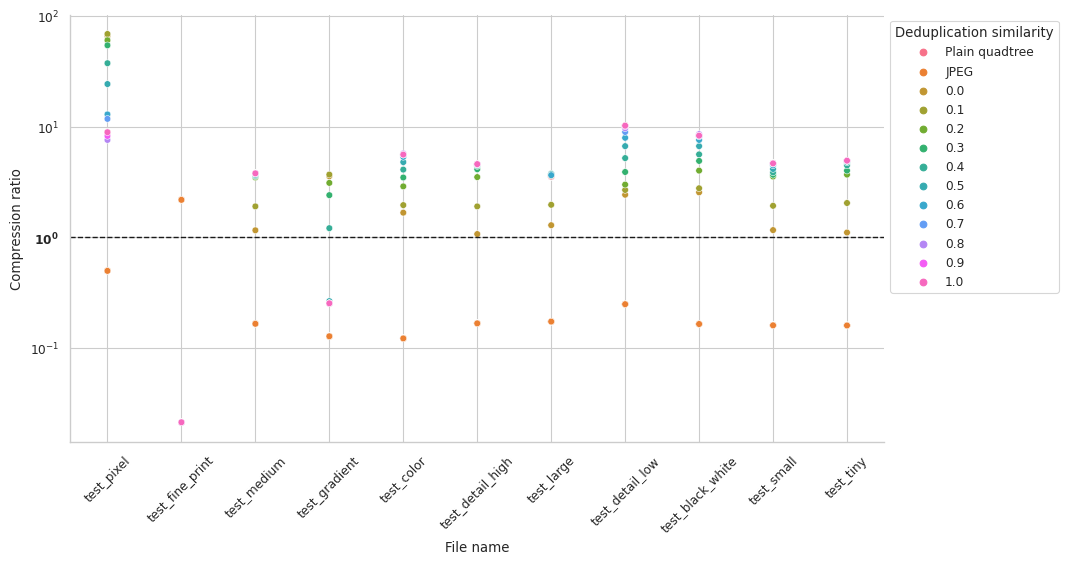

In [4]:
# Compression ratio
df_sorted = df_merged.sort_values('similarity')

df_first = df_sorted.loc[:, ('file_name', 'compression_ratio')].rename(
    columns={'compression_ratio': 'c'})
df_first['class'] = 'plain_run'

df_second = df_sorted.loc[:, ('file_name', 'compression_ratio_y')].rename(
    columns={'compression_ratio_y': 'c'})
df_second['class'] = 'jpeg'

df_third = df_sorted.loc[:, ('file_name', 'compression_ratio_x', 'similarity')].rename(
    columns={'compression_ratio_x': 'c', 'similarity': 'class'})

# Concatenate data frames
df_concat = pd.concat([df_first, df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='c',
    data=df_concat,
    hue='class',
    aspect=16/9,
    facet_kws={'legend_out': False},
)

# Bold 10⁰
yticklabels = g.ax.get_yticklabels()
yticklabels[3].set_fontweight('bold')
g.set_yticklabels(yticklabels)

# Draw line through 10⁰
g.ax.axhline(y=10**0, color='k', linestyle='--', linewidth=1)

g.set(xlabel='File name', ylabel='Compression ratio', yscale='log')

legend = g.axes.flat[0].get_legend()
legend.set_bbox_to_anchor((1, 1))
legend.set_title('Deduplication similarity')
for t, l in zip(legend.texts, ['Plain quadtree ', 'JPEG']):
    t.set_text(l)

plt.xticks(rotation=45)

plt.show()


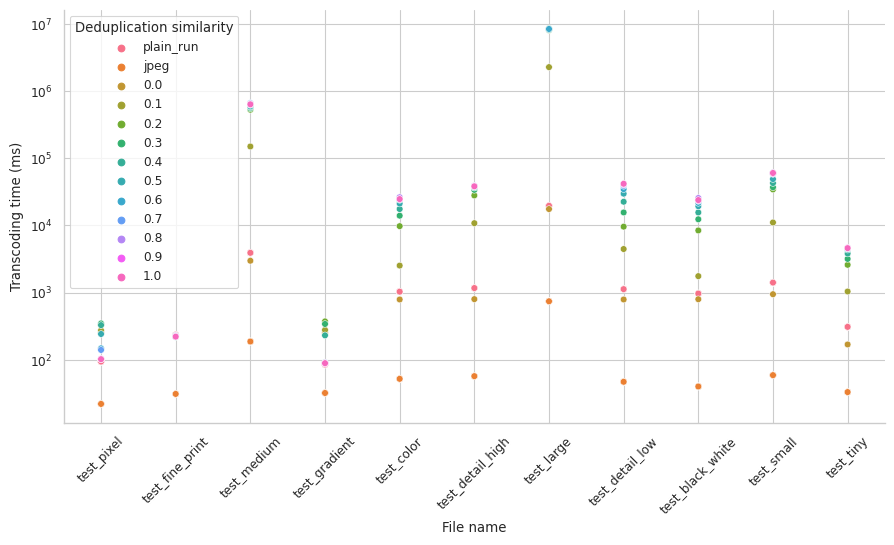

In [5]:
# Transcoding time
df_sorted = df_merged.sort_values('similarity')

df_first = df_sorted.loc[:, ('file_name', 'transcoding_time')].rename(
    columns={'transcoding_time': 't'})
df_first['class'] = 'plain_run'

df_second = df_sorted.loc[:, ('file_name', 'transcoding_time_y')].rename(
    columns={'transcoding_time_y': 't'})
df_second['class'] = 'jpeg'

df_third = df_sorted.loc[:, ('file_name', 'transcoding_time_x', 'similarity')].rename(
    columns={'transcoding_time_x': 't', 'similarity': 'class'})

# Concatenate data frames
df_concat = pd.concat([df_first, df_second, df_third])

# Create a visualization
g = sns.relplot(
    x='file_name',
    y='t',
    hue='class',
    data=df_concat,
    aspect=16/9,
    facet_kws={'legend_out': False},
)

legend = g.axes.flat[0].get_legend()
legend.set_title('Deduplication similarity')
# for t, l in zip(legend.texts, ['Plain Quadtree (zip)', 'JPEG', 'Gzip']):
#     t.set_text(l)

# ticks = [2**x for x in range(4, 24)]
g.set(xlabel='File name', ylabel='Transcoding time (ms)',
      yscale='log')#, yticks=ticks, yticklabels=ticks)

plt.xticks(rotation=45)

plt.show()